# Project: Netflix Analytics

<img src="https://live.staticflickr.com/516/19338701712_eca6a4e612_b.jpg" width="400" height="300">

</br>

# Description:
### In this project, we will analyse the Netflix data we have. In that, we will see the basic structure -- Missing values, duplicates, shape of data. We will deal with null values, if applicable. Moreover, we will visualize data in terms of distribution, etc. Furthermore, we will tarin a Machine Learning model, which will give future prediction -- Content/ Type.

# Work Flow </br>

1. Data Analysis  </br>
2. Machine Learning </br>

<h3><b><u>Dataset Link:</u></b> <a href="https://drive.google.com/file/d/1cWcK8cddROe_DSv5zH5Fk7od32tK3ftf/view" target="_blank">Click here to view the dataset</a></h3> </br>

<h3> Dataset description: </br>
This dataset seems to represent transaction data from a coffee shop. It includes records of sales, with details such as the date and time of each transaction, the payment method (card), the transaction amount, and the type of coffee sold. Each row corresponds to a (unique) transaction, and the customer is identified by a unique card number. From this data, insights into customer preferences and sales trends over time for different coffee types, like Latte, Hot Chocolate, Americano, and others can be made. </h3>

# Importing Libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading & Viewing Data

In [ ]:
# Loading data
url = "https://drive.google.com/uc?export=download&id=1cWcK8cddROe_DSv5zH5Fk7od32tK3ftf"
df = pd.read_csv(url)

In [ ]:
# Data
display(df.head())

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Analysis

In [ ]:
# (No. of rows, No. of columns)
df.shape

(8790, 10)

In [ ]:
# Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
# Data Stats
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Data descritption
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Null values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
df['rating'].unique() # Rating is not in numbers

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Confirm whether any column contain zero as null value or not.
# If yes, then make it a perfect nan
for col in df.columns:
  df[col] = df[col].replace(0, np.nan)
  print(df[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0


No null values there

# Data Analysis through Visualization (if applicable)

* Descriptive statistics

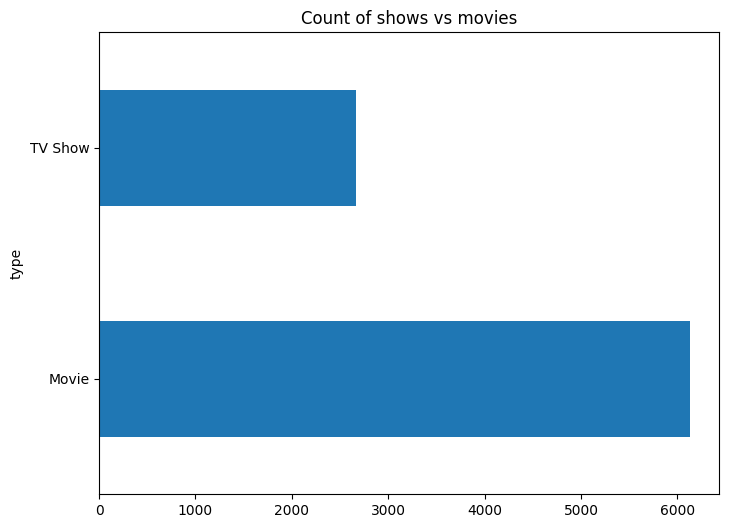

In [ ]:
# Count of shows vs movies
plt.figure(figsize=(8, 6))
plt.title('Count of shows vs movies')
df['type'].value_counts().plot(kind='barh')
plt.show()

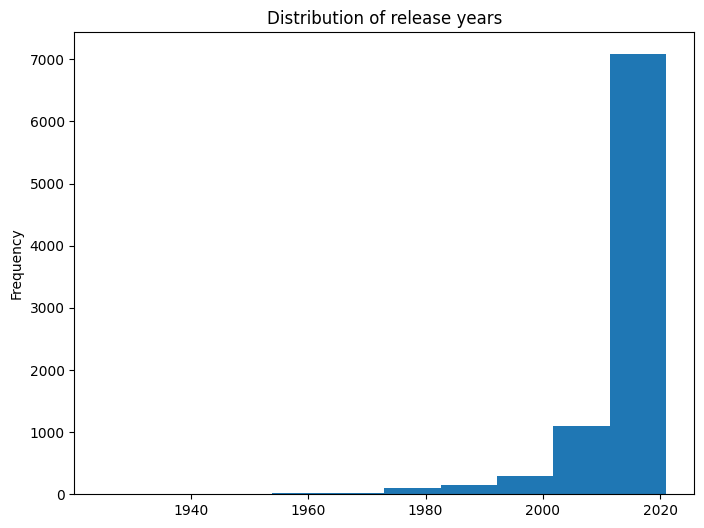

In [ ]:
# Distribution of release years
plt.figure(figsize=(8, 6))
plt.title('Distribution of release years')
df['release_year'].plot(kind='hist')
plt.show()

Data is strongly left skewed. With most values at the right end.

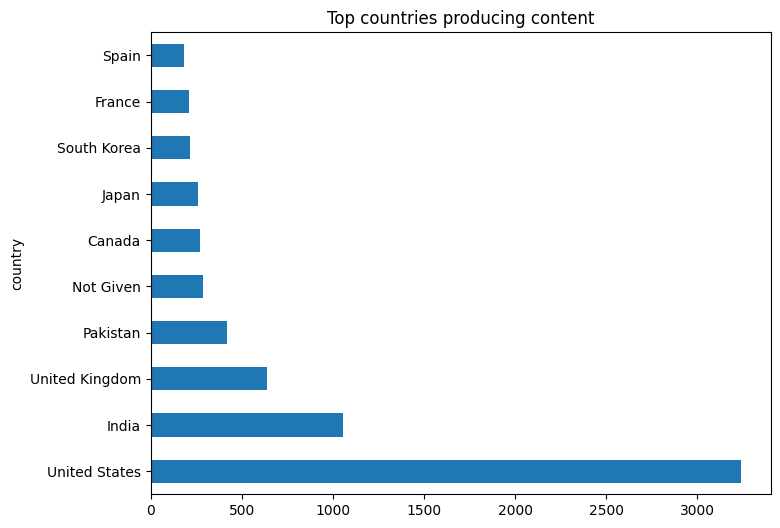

In [ ]:
# Top 10 countries producing content
plt.figure(figsize=(8, 6))
plt.title('Top countries producing content')
df['country'].value_counts().head(10).plot(kind='barh')
plt.show()

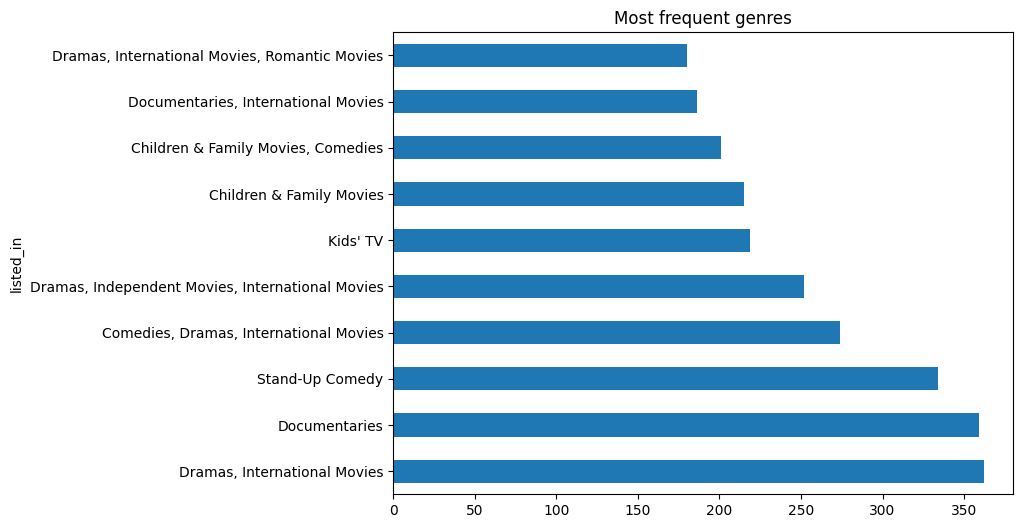

In [ ]:
# Most frequent genres (Top 10)
plt.figure(figsize=(8, 6))
plt.title('Most frequent genres')
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.show()

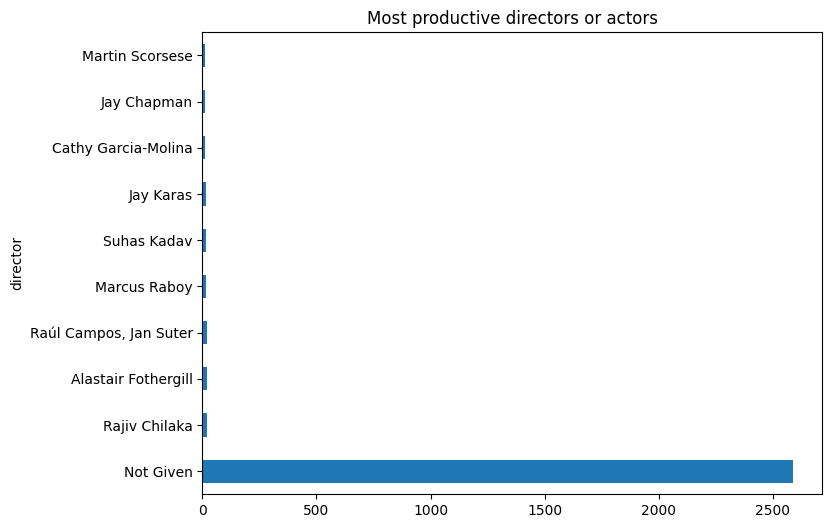

In [ ]:
# Directors with most producing content (Top 10)
plt.figure(figsize=(8, 6))
plt.title('Most productive directors or actors')
df['director'].value_counts().head(10).plot(kind='barh')
plt.show()

In [ ]:
# Data for below plot
x = df['release_year'].value_counts().sort_index().index
y = df['release_year'].value_counts().sort_values().values

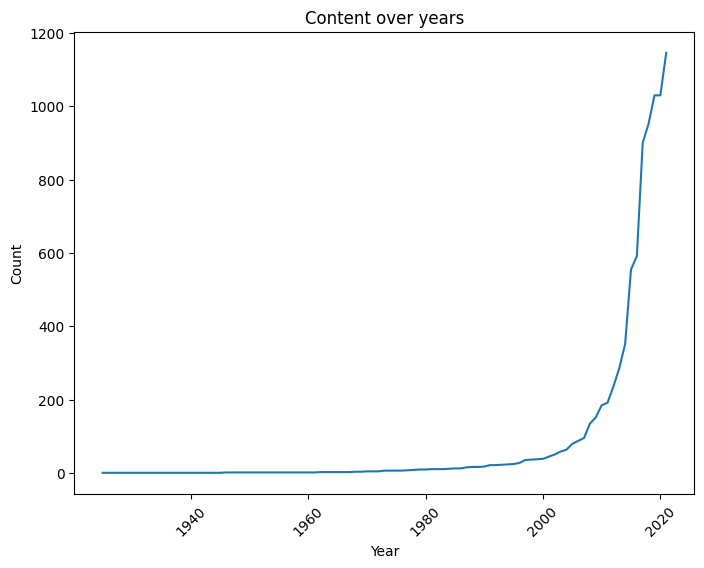

In [ ]:
# Content over years
plt.figure(figsize=(8, 6))
plt.title('Content over years')
plt.plot(x, y)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

An upward trend indicating more and more contents being created with increase in year. A direct proportionality.

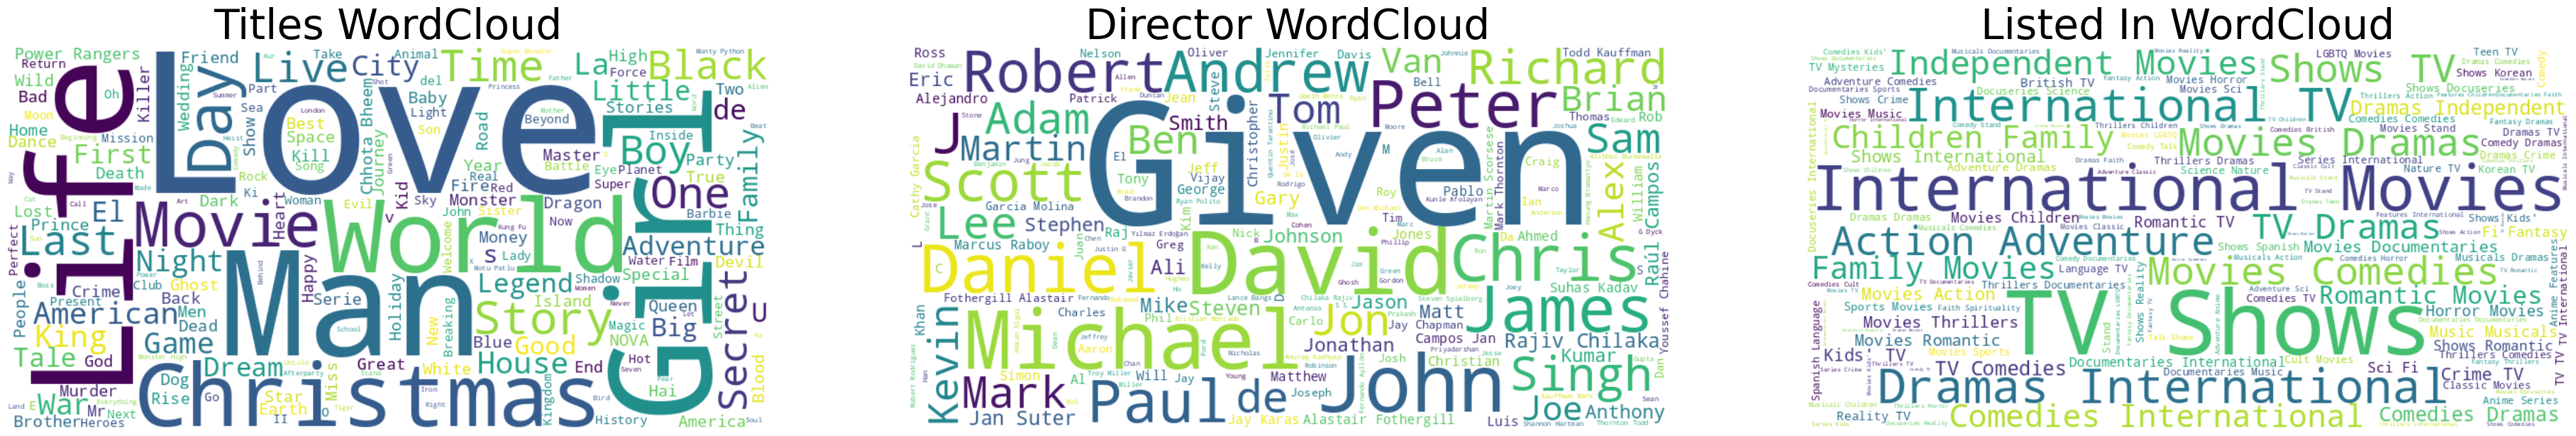

In [ ]:
# Wordclouds for title, director, listed_in -- Assisted by AI
from wordcloud import WordCloud

# Converting the columns to single string
titles_text = ' '.join(df['title'].astype(str))
director_text = ' '.join(df['director'].astype(str))
listed_in_text = ' '.join(df['listed_in'].astype(str))

# Generate the WordClouds
title_wc = WordCloud(width=800, height=400, background_color='white').generate(titles_text)
director_wc = WordCloud(width=800, height=400, background_color='white').generate(director_text)
listed_in_wc = WordCloud(width=800, height=400, background_color='white').generate(listed_in_text)

# Plot the WordClouds
plt.figure(figsize=(40, 35))
plt.rcParams['font.size'] = 35

# Titles WordCloud
plt.subplot(1, 3, 1)
plt.imshow(title_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Titles WordCloud')

# Director WordCloud
plt.subplot(1, 3, 2)
plt.imshow(director_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Director WordCloud')

# Listed In WordCloud
plt.subplot(1, 3, 3)
plt.imshow(listed_in_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Listed In WordCloud')

plt.tight_layout(pad=4)
plt.show()

Wordcloud: It helps us to know that which  words (Topic) in the column we choose is most frequent, which sometimes helps us in knowing popularity and trends.

In [ ]:
# Resetting font size to default
plt.rcParams['font.size'] = 12

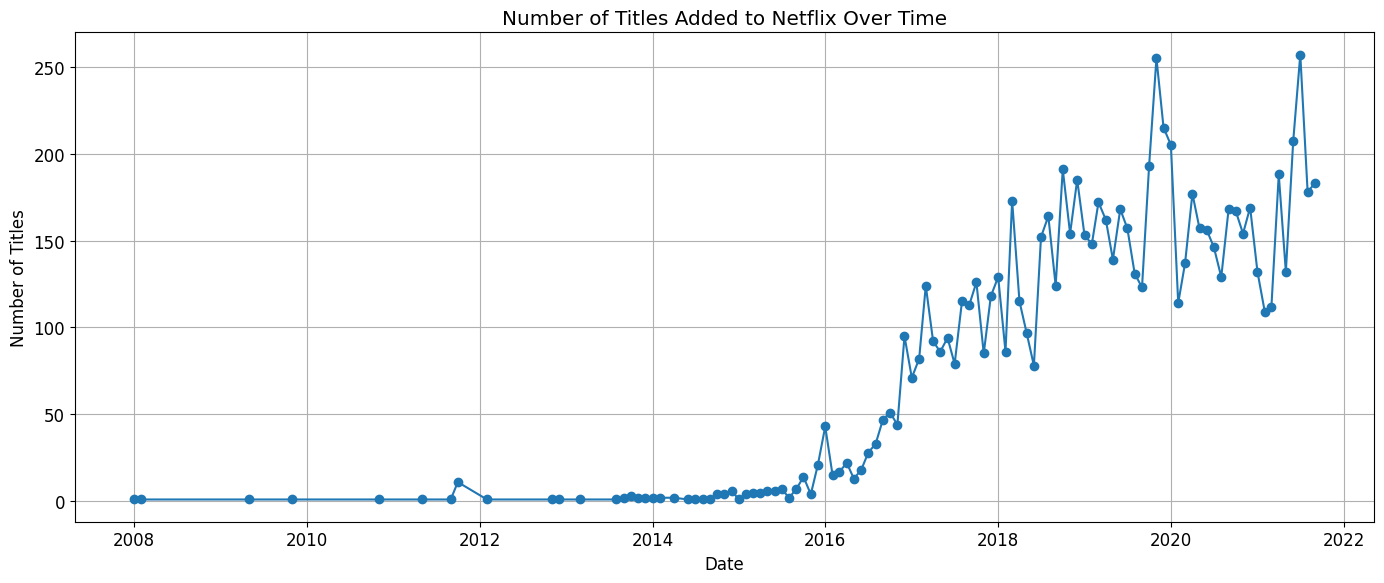

In [ ]:
# Time series plot of content added over time
df['date_added'] = pd.to_datetime(df['date_added'])

# Group by month and count
monthly_counts = df.groupby(df['date_added'].dt.to_period('M')).size()

# Convert PeriodIndex to datetime
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

This detail plot checks for content added every month for the given period.

In [ ]:
# Max content added a month -- Relative to the database
monthly_counts.max()

257

In [ ]:
# Unique value in ratings
df.rating.unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

* Correlation between Director & Rating </br> </br>

This is helpful to understand the type of director -- what sorta videos a director makes? </br>

<h3> Rating column elaboration: </h3>

### 🎬 **Movie Ratings (MPAA / MPA)**

- **G (General Audiences)**: Suitable for all ages.
- **PG (Parental Guidance Suggested)**: Some material may not be suitable for children.
- **PG-13**: Parents strongly cautioned. Some material may be inappropriate for children under 13.
- **R (Restricted)**: Restricted to viewers over 17 (or 18). Under 17 requires an accompanying adult.
- **NC-17**: No one 17 and under admitted.
- **NR (Not Rated)**: The movie hasn’t been officially rated.
- **UR (Unrated)**: Another way to say it hasn’t been rated—often used for director's cuts or festival releases.

---

### 📺 **TV Ratings (TV Parental Guidelines)**

- **TV-Y**: Suitable for all children.
- **TV-Y7**: Suitable for children age 7 and older.
- **TV-Y7-FV**: TV-Y7 with fantasy violence—may be more intense.
- **TV-G**: General audience; suitable for all ages.
- **TV-PG**: Parental guidance suggested.
- **TV-14**: May be unsuitable for children under 14.
- **TV-MA**: Mature audience only; may be unsuitable for under 17.




In [ ]:
# Checkpoint for dataframe: Helpful if needs revert
df_copy = df.copy()

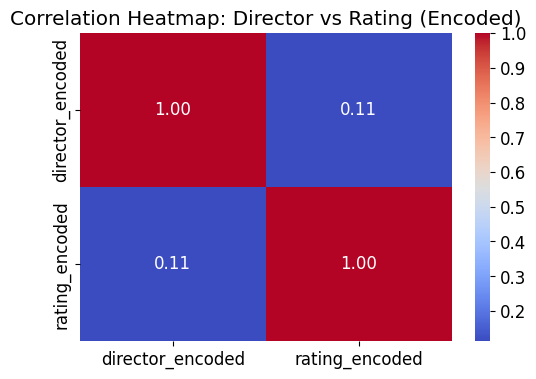

In [ ]:
# Heatmap Correlation requires encoding first
from sklearn.preprocessing import LabelEncoder

# Encode 'rating'
rating_encoder = LabelEncoder()
df_copy['rating_encoded'] = rating_encoder.fit_transform(df_copy['rating'])

# Encode 'director'
director_encoder = LabelEncoder()
df_copy['director_encoded'] = director_encoder.fit_transform(df_copy['director'])

# Create correlation dataframe
corr_df = df_copy[['director_encoded', 'rating_encoded']]

# Compute correlation
corr = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Director vs Rating (Encoded)")
plt.show()

This help us know that whether director have some correlation with the raing or not. Corerelation is quite low, this just tests linear association between encoded IDs, not actual semantics.

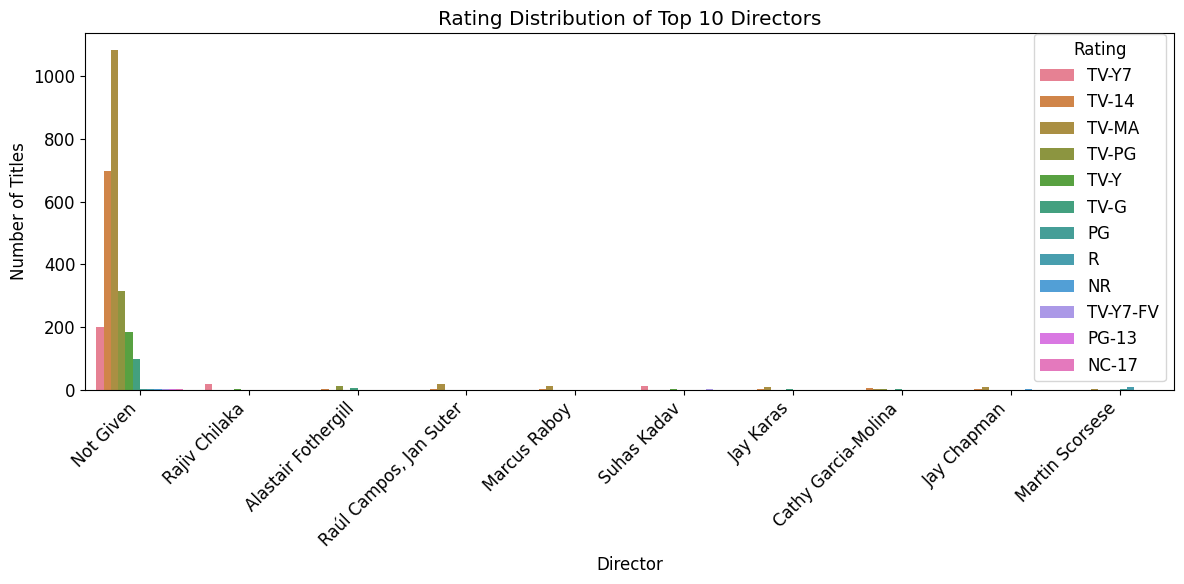

In [ ]:
# Get top N most frequent directors
top_directors = df['director'].value_counts().head(10).index

# Filter for only those directors
df_top_directors = df[df['director'].isin(top_directors)]

# Create a count plot: director vs rating
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_directors, x='director', hue='rating', order=top_directors)
plt.title('Rating Distribution of Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

The above plot basically shows, directors with the type of contents they produce. Not Given is ignored in below plot.

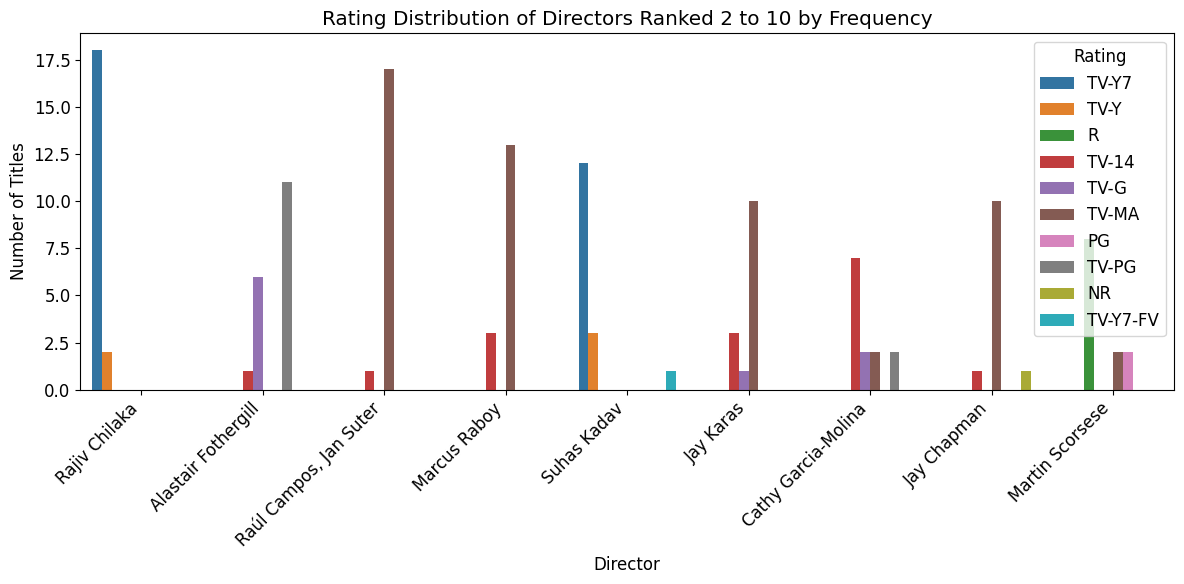

In [ ]:
# Get top 2 to 10 most frequent directors (excluding the top 1)
top_directors = df_copy['director'].value_counts().iloc[1:10].index

# Filter for only those directors
df_top_directors = df_copy[df_copy['director'].isin(top_directors)]

# Create a count plot: director vs rating
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_directors, x='director', hue='rating', order=top_directors)
plt.title('Rating Distribution of Directors Ranked 2 to 10 by Frequency')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

This shows, director and their content distribution focusing on rating given to them.

* TV SHOWS ARE MORE PRODUCED OR MOVIES

<Axes: title={'center': 'Content Types Over Time'}, xlabel='release_year'>

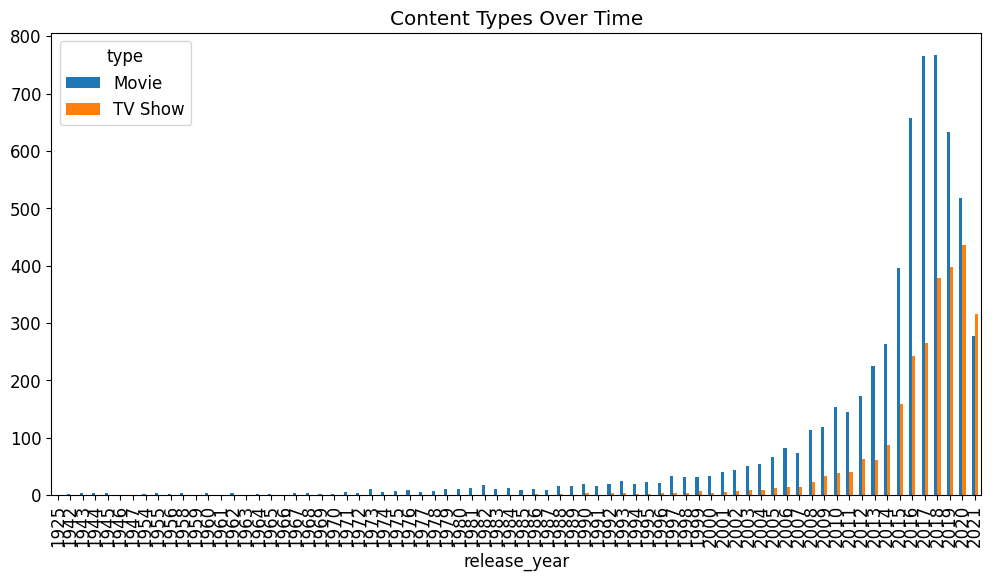

In [ ]:
# Group by release_year and type
df.groupby(['release_year', 'type']).size().unstack().plot(kind='bar', stacked=False, figsize=(12, 6), title='Content Types Over Time')

* Country-Specific Trends

<Axes: title={'center': 'Top Countries by Content Type'}, xlabel='country'>

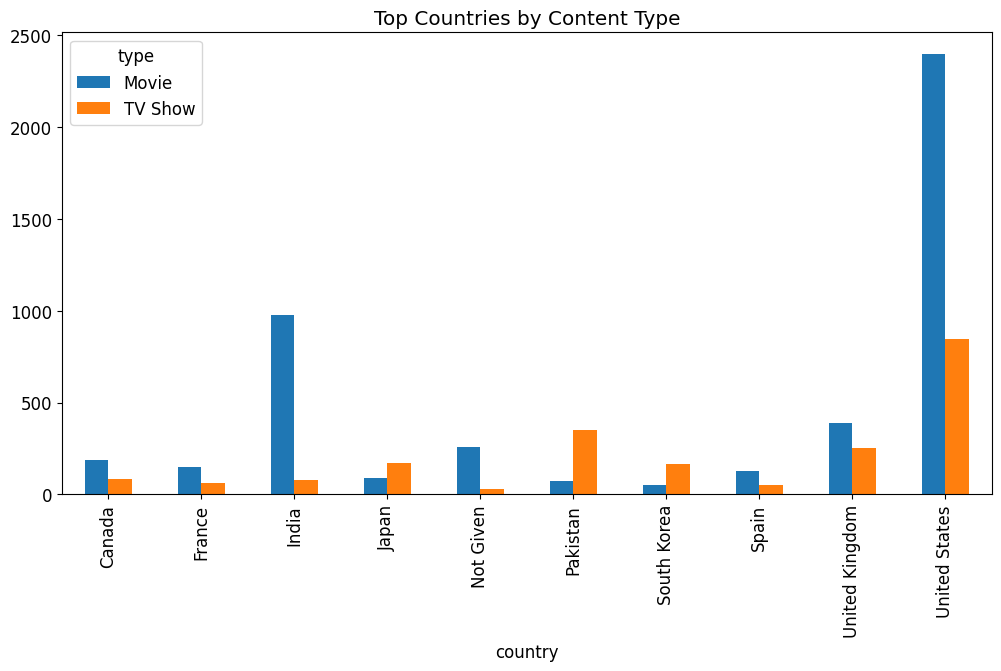

In [ ]:
# Top 10 countries by content count
top_countries = df['country'].value_counts().nlargest(10)

# Plot top countries by content type
df[df['country'].isin(top_countries.index)].groupby(['country', 'type']).size().unstack().plot(kind='bar', figsize=(12, 6), title='Top Countries by Content Type')

* Duration analysis of Movies

<ipython-input-65-60e95c4b1987>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_durations['duration_min'] = movie_durations['duration'].str.extract('(\d+)').astype(float)


<Axes: >

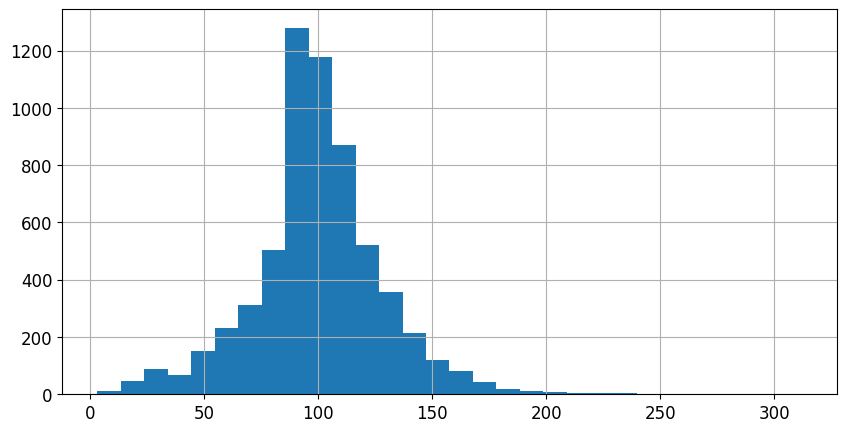

In [ ]:
# Filter only movie durations that are in minutes
movie_durations = df[(df['type'] == 'Movie') & (df['duration'].str.contains('min'))]

# Extract duration as integer
movie_durations['duration_min'] = movie_durations['duration'].str.extract('(\d+)').astype(float)

# Plot distribution
movie_durations['duration_min'].hist(bins=30, figsize=(10, 5))

Most movies are of 100 mins length with some extreme seen on both ends

# Machine Learning </br>
<b> Content Type Prediction (Movie vs. TV Show) </b> </br>

We can perform multiple ML tasks, such as Content type Prediction, Genre Clustering, Rating prediction, Anomaly detection: Movies with just 5 mins. However, I will be doing one. </br> </br>

-- Assisted by AI

* Importing Libs

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels

* Preprocess data

In [ ]:
# Filter out rows where duration is not in minutes
df_filtered = df[df['duration'].str.contains('min')].copy()

# Extract numeric duration
df_filtered['duration_min'] = df_filtered['duration'].str.extract('(\d+)').astype(float)

# Encode 'rating'
df_filtered['rating'] = df_filtered['rating'].fillna('Unknown')
rating_encoder = LabelEncoder()
df_filtered['rating_encoded'] = rating_encoder.fit_transform(df_filtered['rating'])

# Fill missing values
df_filtered['listed_in'] = df_filtered['listed_in'].fillna('')
df_filtered['release_year'] = df_filtered['release_year'].fillna(df_filtered['release_year'].median())

# Target
df_filtered['type'] = df_filtered['type'].map({'Movie': 0, 'TV Show': 1})

* Feature Extraction

In [ ]:
# Define features and target
X = df_filtered[['duration_min', 'rating_encoded', 'listed_in', 'release_year']]
y = df_filtered['type']

# Use TF-IDF on 'listed_in' and scale other features
preprocessor = ColumnTransformer(transformers=[
    ('tfidf', TfidfVectorizer(max_features=50), 'listed_in'),
    ('scale', StandardScaler(), ['duration_min', 'rating_encoded', 'release_year'])
])

* Train - Test Split & Model Pipeline

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
clf_pipeline.fit(X_train, y_train)

# Predict
y_pred = clf_pipeline.predict(X_test)

# Results
labels = sorted(unique_labels(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=labels, target_names=[['Movie', 'TV Show'][i] for i in labels]))

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1226

    accuracy                           1.00      1226
   macro avg       1.00      1.00      1.00      1226
weighted avg       1.00      1.00      1.00      1226



*Note:* Our model is worst. This is because we only have one target value. While filtering we removed all the TV Shows option, as it was in Seasons.

</br>

### Future Scope:
* Machine Learning more accurately.
* Working on this problem statement more properly.

### Conclusion:
* We have perfomed data analysis comprehensively.
* However, machine learning was proposed but was not preformed the way intended.

### References
* Geeks For Geeks: https://www.geeksforgeeks.org/generating-word-cloud-python/
* https://towardsdatascience.com/change-font-size-matplolib-480630e300b4/: https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/
* Towards Data Science: https://towardsdatascience.com/change-font-size-matplolib-480630e300b4/
* Wikipedia: https://en.wikipedia.org/wiki/Tf%e2%80%93idf
* Matplotlib, SciKit - Learn official documentation
* GPT Assistance